In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from PIL import Image

# Projeto 1 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Gabriel Roberto de Queiroz
## Matrícula: 221020870

# Questão 1

## Questão 1a (0.5 pontos)

O objetivo deste exercício é estudar a decimação e a interpolação de sinais. 
Escreva uma função em python que receba um sinal x[n] e retorne um sinal y[n] que seja a decimação por um fator de 2 do sinal de entrada x[n]. 

Em seguida, use a sua função para encontrar o sinal decimado para a entrada: 

$$ x = \left[1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0 \right]$$

In [27]:
### PLOTTING FUNCTIONS
def plot_single(x, label="Plot"):
   n = np.arange(0, len(x), step=1)
   plt.figure(figsize=(10, 5))
   plt.stem(n, x, linefmt="blue", markerfmt="o", basefmt=" ")
   plt.xticks(n)
   plt.yticks(np.arange(min(x)-1, max(x)+2, step=1))
   plt.title("Analytical Solution")
   plt.gcf().set_size_inches(10, 5)
   plt.grid()
   plt.show()
   return

def plot_multiple(x, y, first_label="First plot", second_label="Second plot"):
   plt.figure(figsize=(10, 5))
   plt.subplot(2, 1, 1)
   plt.stem(x, linefmt="orange", markerfmt="o", basefmt=" ")
   plt.xticks(np.arange(0, len(x), step=1))
   plt.yticks(np.arange(min(x)-1, max(x)+2, step=1))
   plt.title(first_label)
   plt.grid()

   plt.subplot(2, 1, 2)
   plt.stem(y, linefmt="blue", markerfmt="o", basefmt=" ")
   plt.xticks(np.arange(0, len(y), step=1))
   plt.yticks(np.arange(min(x)-1, max(y)+2, step=1))
   plt.title(second_label)

   plt.subplots_adjust(hspace=0.5)
   plt.grid()
   plt.show()

def plot_compare(x, y):
   
   return

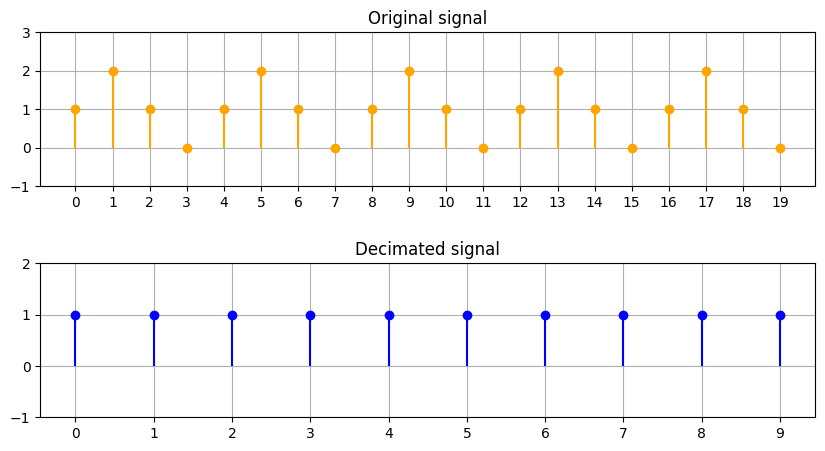

In [28]:
### Código da questão 1a.
FACTOR = 2

x = [1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0]


def decimator(x_temp):
    return x_temp[::FACTOR]

y = decimator(x)

plot_multiple(x, y, first_label="Original signal", second_label="Decimated signal")

## Questão 1b (0.5 pontos)

Escreva uma função em python que receba um sinal y[n] e retorne um sinal z[n] que seja a interpolação por um fator de 2 do sinal de entrada y[n]. A sua função deve aumentar o número de amostras e assinalar um novo valor para as amostras criadas. Você pode escolher se as amostras interpoladas terão o valor médio das amostras ou o valor da amostra anterior. 

Em seguida, utilize a sua função para encontrar o sinal interpolado para o sinal y[n] da questão anterior (1a).


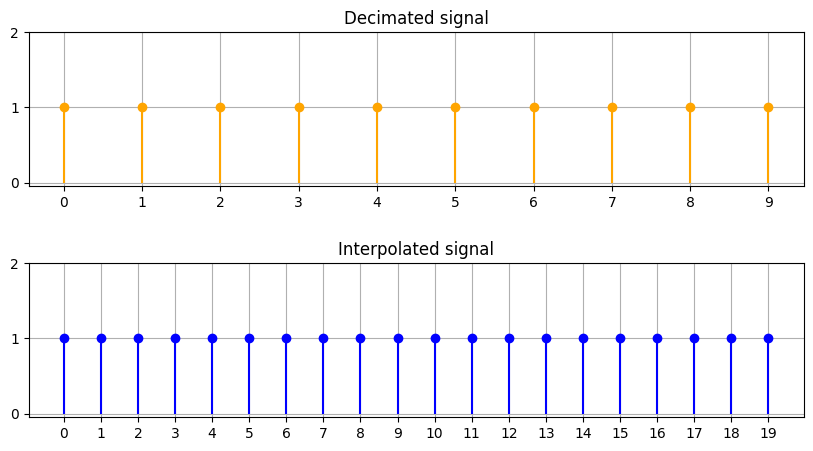

In [29]:
### Código da questão 1b.

INTERP_RULE = {"PREVIOUS": "PREVIOUS", "AVERAGE": "AVERAGE"}
FACTOR = 2


def interpolator(y_temp, rule):
    if rule == "PREVIOUS":
        return np.array([y_temp[i // FACTOR] for i in range(len(y_temp) * FACTOR)])
    elif rule == "AVERAGE":
        # A média é calculada entre os valores anterios e posterior ao atual
        average = lambda x, y_temp: (x + y_temp) / 2
        return np.array(
            [
                (
                    average(y_temp[i // FACTOR], y_temp[i // FACTOR + 1])
                    if i % FACTOR != 0
                    else y_temp[i // FACTOR]
                )
                for i in range(len(y_temp) * FACTOR - 1)
            ]
            + [y_temp[-1]]
        )
    else:
        raise ValueError("Invalid interpolation rule")


z = interpolator(y, INTERP_RULE["AVERAGE"])

plot_multiple(y, z, first_label="Decimated signal", second_label="Interpolated signal")

## Questão 1c (1 ponto)

Uma imagem é um sinal discreto de duas dimensões. 
Escrevemos I(x,y) para representar esta imagem como uma matriz bidimensional de dimensões (w x h), onde w é a largura da imagem e h a sua altura.

Para imagens, fazemos a decimação e a interpolação separadamente, para todas as linhas e, em seguida, para todas as colunas (ou vice-versa), considerando que cada linha ou coluna é um sinal de uma dimensão.

Aplique o seu algoritmo de decimação sucessivamente até obter uma imagem com tamanho (w/16 x h/16), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante.

Imagem original de tamanho: 512 x 512
Imagem decimada de tamanho: 32 x 32


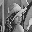

In [30]:
### Código da questão 1c.
im = Image.open("lena.bmp")  # O objeto im é da classe Image.
A = np.array(im)  # Transformo o objeto Image para a classe NP.array
h, w = A.shape
print(f"Imagem original de tamanho: {h} x {w}")
im

for i in range(4):
    A = decimator(A)
    A = decimator(A.T).T


h, w = A.shape
print(f"Imagem decimada de tamanho: {h} x {w}")
im = Image.fromarray(A)
im

## Questão 1d (1 ponto)

Utilizando como entrada a imagem decimada (de tamanho w/16 x h/16) da questão anterior (1c), aplique o seu algoritmo de interpolação sucessivamente até obter uma imagem com tamanho (w x h), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante. Compare a imagem original com a imagem que foi decimada/interpolada. 

Imagem interpolada de tamanho: 512 x 512


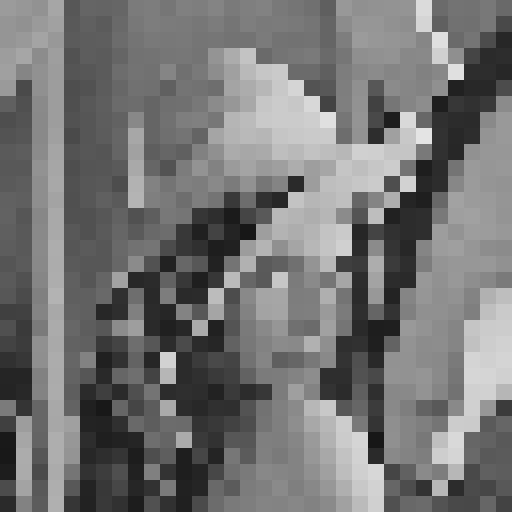

In [31]:
### Código da questão 1d.
for _ in range(4):
    # Pode escolher entre "PREVIOUS" e "AVERAGE"
    A = interpolator(A, INTERP_RULE["PREVIOUS"])
    A = interpolator(A.T, INTERP_RULE["PREVIOUS"]).T

h, w = A.shape
print(f"Imagem interpolada de tamanho: {h} x {w}")
im = Image.fromarray(A).convert("L")
im

# Questão 2

Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] + \frac{1}{6}y\left[n\right] = x\left[n+2\right] + 2x\left[n+1\right]+x\left[n\right] $$
$$ x\left[n\right] = \left(\frac{1}{4}\right)^n u\left[n\right] $$
$$ y\left[-1\right] = y\left[-2\right] = 0 $$

## Questão 2a (1 ponto)

Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

/home/coffee/UnB/UnB_SSTD/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/coffee/UnB/UnB_SSTD/.venv/lib/python3.12/site-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/home/coffee/UnB/UnB_SSTD/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


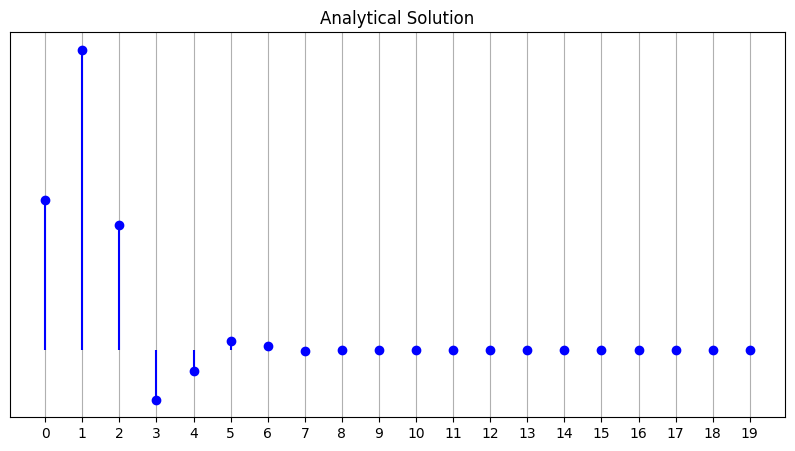

In [35]:
### Código da questão 2a.
a_0 = 1
a_1 = 0
a_2 = 1 / 6
b_0 = 1
b_1 = 2
b_2 = 1

INITIAL_CONDITION = {-1: 0, -2: 0}

def impulse(n):
    return 1 if n == 0 else 0


def step(n):
    return 1 if n >= 0 else 0

RECURSIVE_OPTMIZATION_MATRIX = [["x" for i in range(101)] for j in range(101)]

def impulse_response_recursive_solution(n):
    if n in INITIAL_CONDITION:
        return INITIAL_CONDITION[n]

    if RECURSIVE_OPTMIZATION_MATRIX[n][n] != "x":
        return RECURSIVE_OPTMIZATION_MATRIX[n][n]
    
    solution = (
        -a_1 * impulse_response_recursive_solution(n - 1)
        - a_2 * impulse_response_recursive_solution(n - 2)
        + b_2 * impulse(n - 2)
        + b_1 * impulse(n - 1)
        + b_0 * impulse(n)
    ) / a_0

    RECURSIVE_OPTMIZATION_MATRIX[n][n] = solution

    return solution


def impulse_response_analytical_solution(n):
    roots = np.roots([a_0, a_1, a_2])
    y_c = 0

    if np.iscomplexobj(roots):
        quoeficient_matrix = np.array(
            [
                np.abs(roots) ** i * np.exp(1j * np.angle(roots) * i)
                for i in range(1, len(roots) + 1)
            ]
        )
        results = np.array([impulse_response_recursive_solution(i) for i in range(1, len(roots) + 1)])
    else:
        quoeficient_matrix = np.array([roots**i for i in range(len(roots))])
        results = np.array([impulse_response_recursive_solution(i) for i in range(len(roots))])

    autovalues = np.linalg.solve(quoeficient_matrix, results)

    for i in range(len(roots)):

        y_c += autovalues[i] * roots[i] ** n

    return (b_2 / a_2) * impulse(n) + step(n) * y_c


RECURSIVE_OPTMIZATION_MATRIX = [["x" for i in range(101)] for j in range(101)]
y_2a = [impulse_response_analytical_solution(i) for i in range(20)]

plot_single(y_2a, label="Analytical Solution")

## Questão 2b (1 ponto)
Escreva um código para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida iterativamente com a resposta analítica para as primeiras 100 amostras, plotando o gráfico das duas respostas.

Calcule também o erro médio quadrático entre os dois sinais, h[n] analítico e g[n] iterativo, através da equação:

$$ MSE = \frac{1}{N} \sum_{i=0}^{N-1} \left( h\left[i\right] - g\left[i\right] \right)^2 $$

onde N é o número de amostras considerado (no caso, 100 amostras).

In [19]:
### Código da questão 2b.

# Erro médio quadrático entre as funções f e g para n iterações
def erro_medio_quadratico(f,g,n):
    return ((f(n) - g(n)) ** 2) / n

h_2a_error = erro_medio_quadratico(impulse_response_recursive_solution, impulse_response_analytical_solution, 100)

print(f"⚠️⚠️⚠️ Erro médio quadrático: {np.abs(h_2a_error)}")

n = np.arange(0, 100)

RECURSIVE_OPTMIZATION_MATRIX = [["x" for i in range(101)] for j in range(101)]
y_2b = [impulse_response_recursive_solution(i) for i in n]


⚠️⚠️⚠️ Erro médio quadrático: 2.0651105224039533e-108


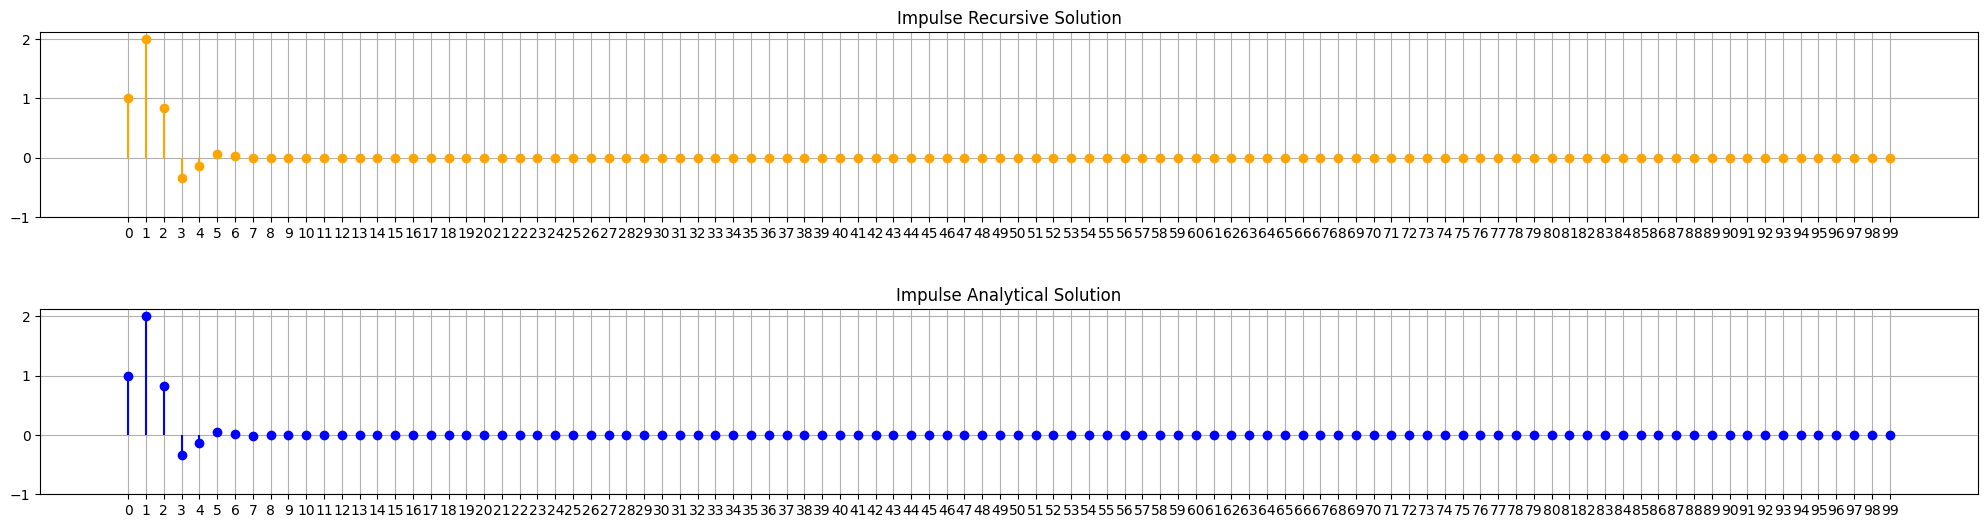

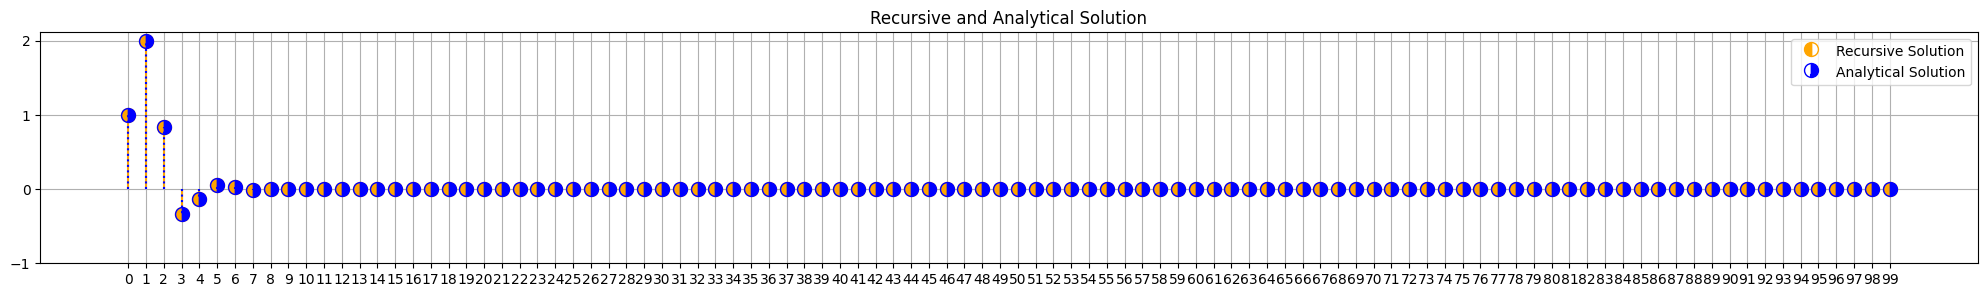

In [20]:
### ESPAÇO PARA APRESENTAÇÃO DAS 100 PRIMEIRAS AMOSTRAS DA RESPOSTA AO DEGRAU (Questão 2b)
n = np.arange(0, 100)
RECURSIVE_OPTMIZATION_MATRIX = [["x" for i in range(101)] for j in range(101)]
h_2b_recursive = [impulse_response_recursive_solution(i) for i in n]
h_2b_analytical = [impulse_response_analytical_solution(i) for i in n]

plt.figure()
plt.subplot(2, 1, 1)
plt.stem(n, h_2b_recursive, linefmt="orange", markerfmt="o", basefmt=" ")
plt.xticks(np.arange(0, len(n), step=1))
plt.yticks(np.arange(-1, 3, step=1))
plt.title("Impulse Recursive Solution")
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(n, h_2b_analytical, linefmt="blue", markerfmt="o", basefmt=" ")
plt.xticks(np.arange(0, len(n), step=1))
plt.yticks(np.arange(-1, 3, step=1))
plt.title("Impulse Analytical Solution")
plt.grid()

plt.subplots_adjust(hspace=0.5)
plt.gcf().set_size_inches(25, 6)

plt.show()


plt.figure()

markerline, stemlines, baseline = plt.stem(
    n, h_2b_recursive, linefmt="orange", markerfmt="o", basefmt=" "
)
plt.setp(stemlines, "color", plt.getp(markerline, "color"))
plt.setp(stemlines, "linestyle", "solid")
plt.setp(markerline, fillstyle="left", markersize=10)

markerline, stemlines, baseline = plt.stem(
    n, h_2b_analytical, linefmt="blue", markerfmt="o", basefmt=" "
)
plt.setp(stemlines, "color", plt.getp(markerline, "color"))
plt.setp(stemlines, "linestyle", "dotted")
plt.setp(markerline, fillstyle="right", markersize=10)

plt.legend(["Recursive Solution", "Analytical Solution"])
plt.xticks(np.arange(0, len(n), step=1))
plt.yticks(np.arange(-1, 3, step=1))
plt.title("Recursive and Analytical Solution")
plt.grid()
plt.gcf().set_size_inches(25, 3)                    
plt.show()

## Questão 2c (1 ponto)

Determine a resposta do sistema às condições iniciais dadas analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

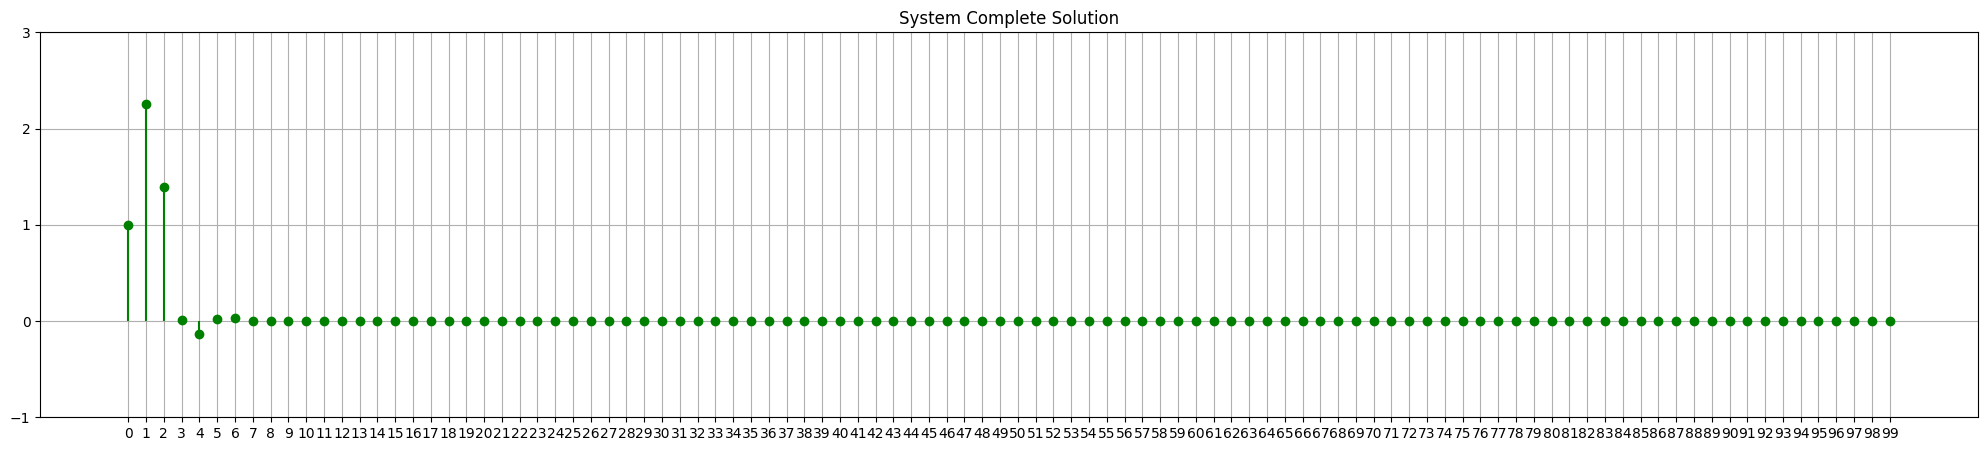

In [44]:
### Código da questão 2c.
### ENTRADA NULA
# def null_entry_impulse_response_analytical_solution(n):
#     roots = np.roots([a_0, a_1, a_2])
#     y_0 = 0

#     if np.iscomplexobj(roots):
#         quoeficient_matrix = np.array(
#             [
#                 np.abs(roots) ** i * np.exp(1j * np.angle(roots) * i)
#                 for i in range(1, len(roots) + 1)
#             ]
#         )
#         results = np.array([condition for condition in INITIAL_CONDITION.values()])
#     else:
#         quoeficient_matrix = np.array([roots**i for i in range(len(roots))])
#         results = np.array([condition for condition in INITIAL_CONDITION.values()])
        
#     autovalues = np.linalg.solve(quoeficient_matrix, results)

#     for i in range(len(roots)):
#         y_0 += autovalues[i] * roots[i] ** n

#     return y_0

x_2c = lambda n:  (1 / 4) ** n * step(n)

def system_solution(x, n):
    if n in INITIAL_CONDITION:
        return INITIAL_CONDITION[n]

    if RECURSIVE_OPTMIZATION_MATRIX[n][n] != "x":
        return RECURSIVE_OPTMIZATION_MATRIX[n][n]
    
    solution = (
        -a_1 * system_solution(x, n - 1)
        - a_2 * system_solution(x, n - 2)
        + b_2 * x(n - 2)
        + b_1 * x(n - 1)
        + b_0 * x(n)
    ) / a_0

    RECURSIVE_OPTMIZATION_MATRIX[n][n] = solution

    return solution

n = np.arange(0, 100)
RECURSIVE_OPTMIZATION_MATRIX = [["x" for i in range(101)] for j in range(101)]
y_2c = [system_solution(x_2c, i) for i in n]

plt.figure()
plt.stem(n, y_2c, linefmt="green", markerfmt="o", basefmt=" ")
plt.xticks(np.arange(0, len(n), step=1))
plt.yticks(np.arange(-1, 4, step=1))
plt.title("System Complete Solution")
plt.grid()
plt.gcf().set_size_inches(25, 5)
plt.show()



### Questão 2d (1 ponto)
Escreva um programa para obter a resposta do sistema através da convolução da entrada com a resposta ao impulso h[n] truncada para as primeiras 20 amostras (isto é, considerando apenas as primeiras 20 amostras de h[n]).

Compare a resposta obtida pela convolução com a resposta obtida analiticamente, plotando o gráfico das duas respostas (calcule as primeiras 100 amostras do sinal). Calcule também o erro médio quadrático entre os dois sinais.

⚠️⚠️⚠️ Erro médio quadrático: 2.2269517803788173e-78


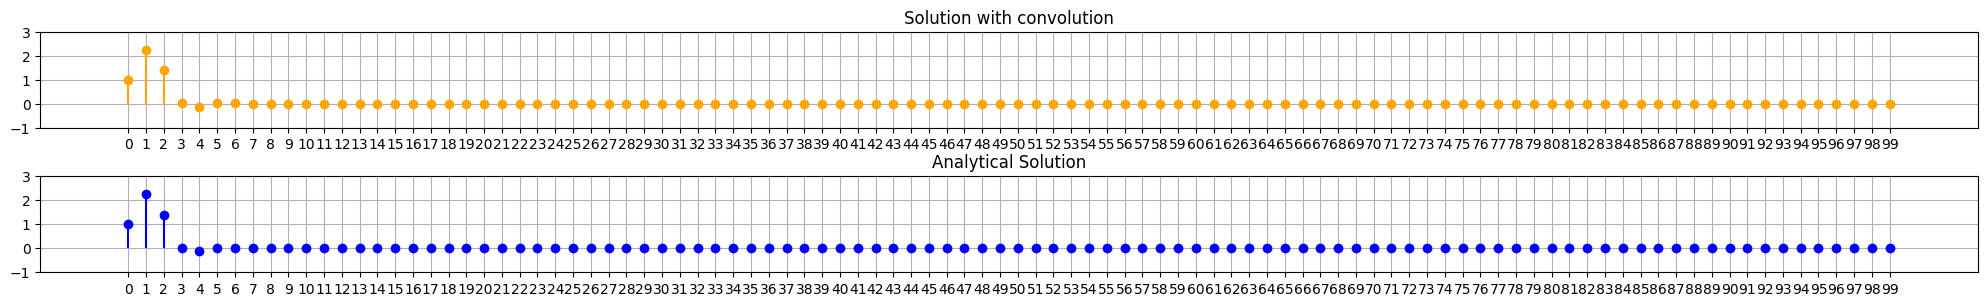

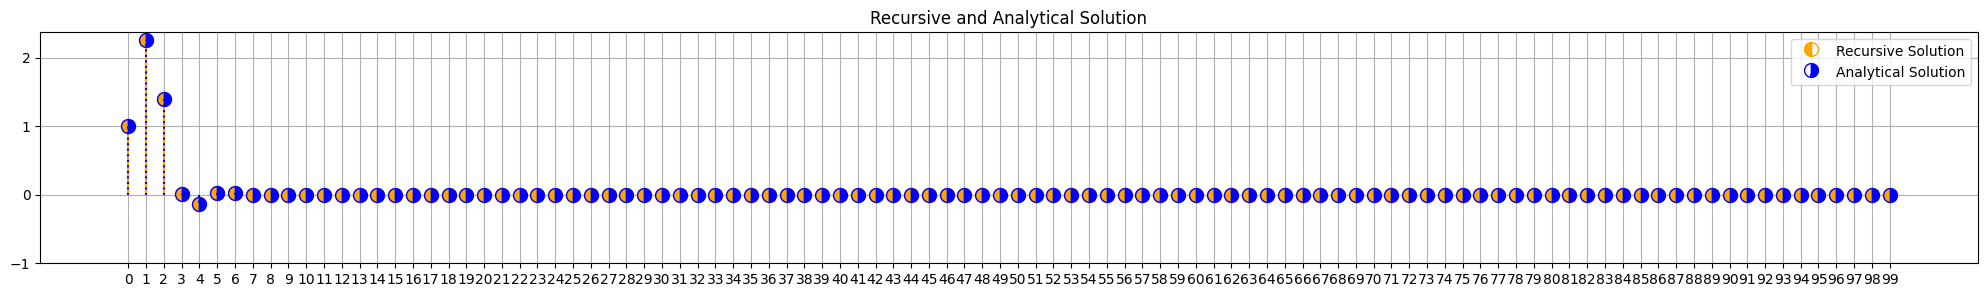

In [47]:
### Código da questão 2d.
def discrete_convolution(x, h):
    y = np.array([])
    for i in range(len(x) + len(h) - 1):
        y = np.append(y, 0)
        for j in range(len(x)):
            if i - j >= 0 and i - j < len(h):
                y[i] += x[j] * h[i - j]
    return y

RECURSIVE_OPTMIZATION_MATRIX = [["x" for i in range(101)] for j in range(101)]
x_2d = [(1 / 4) ** n * step(n) for n in range(81)]
h_2d = np.array(
    [impulse_response_recursive_solution(i) for i in range(20)]
)  # 20 primeiras amostras da resposta ao impulso
y_2d = discrete_convolution(x_2d, h_2d)

err_2d = erro_medio_quadratico( lambda n: y_2d[n], lambda n: system_solution(x_2c, n), 99)

print(f"⚠️⚠️⚠️ Erro médio quadrático: {np.abs(err_2d)}")

plt.figure()
plt.subplot(3, 1, 1)

plt.stem(y_2d, linefmt="orange", markerfmt="o", basefmt=" ")
plt.xticks(np.arange(0, len(y_2d), step=1))
plt.yticks(np.arange(-1, 4, step=1))
plt.title("Solution with convolution")
plt.grid()

plt.subplot(3, 1, 2)
plt.stem(y_2c, linefmt="blue", markerfmt="o", basefmt=" ")
plt.xticks(np.arange(0, 100, step=1))
plt.yticks(np.arange(-1, 4, step=1))
plt.title("Analytical Solution")
plt.grid()

plt.subplots_adjust(hspace=0.5)
plt.gcf().set_size_inches(25, 5)
plt.show()


## COMPARAÇÃO DOS PLOTS
plt.figure()
markerline, stemlines, baseline = plt.stem(
    n, y_2c, linefmt="orange", markerfmt="o", basefmt=" "
)
plt.setp(stemlines, "color", plt.getp(markerline, "color"))
plt.setp(stemlines, "linestyle", "solid")
plt.setp(markerline, fillstyle="left", markersize=10)

markerline, stemlines, baseline = plt.stem(
    n, y_2d, linefmt="blue", markerfmt="o", basefmt=" "
)
plt.setp(stemlines, "color", plt.getp(markerline, "color"))
plt.setp(stemlines, "linestyle", "dotted")
plt.setp(markerline, fillstyle="right", markersize=10)

plt.legend(["Recursive Solution", "Analytical Solution"])
plt.xticks(np.arange(0, len(n), step=1))
plt.yticks(np.arange(-1, 3, step=1))
plt.title("Recursive and Analytical Solution")
plt.grid()
plt.gcf().set_size_inches(25, 3)                    
plt.show()

## Questão 2e (1 ponto)

Usando como entrada o sinal disponibilizado ('data_projeto1.mat'), determine a resposta do sistema. Plote o gráfico da entrada e da saída do sistema. 

In [59]:
### Códgio da Questão 2e
sinal = sp.io.loadmat("data_projeto1.mat")["sinal"].ravel()

RECURSIVE_OPTMIZATION_MATRIX = [["x" for i in range(100001)] for j in range(100001)]
h_2e = [impulse_response_recursive_solution(i) for i in range(100)]

# y = discrete_convolution(sinal, h_2d)
y = [system_solution(lambda n: sinal[n], i) for i in range(10000)]

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(sinal)
plt.title("Sinal de entrada")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(y)
plt.title("Sinal de saída")
plt.grid()

plt.subplots_adjust(hspace=0.5)
plt.gcf().set_size_inches(25, 6)
plt.show()

# Questão 3
Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] -2~\cos \left( \frac{\pi}{8} \right) y\left[n+1\right] + y\left[n\right] = x\left[n\right] $$

## Questão 3a (1 ponto)
Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

/home/coffee/UnB/UnB_SSTD/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/coffee/UnB/UnB_SSTD/.venv/lib/python3.12/site-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/home/coffee/UnB/UnB_SSTD/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


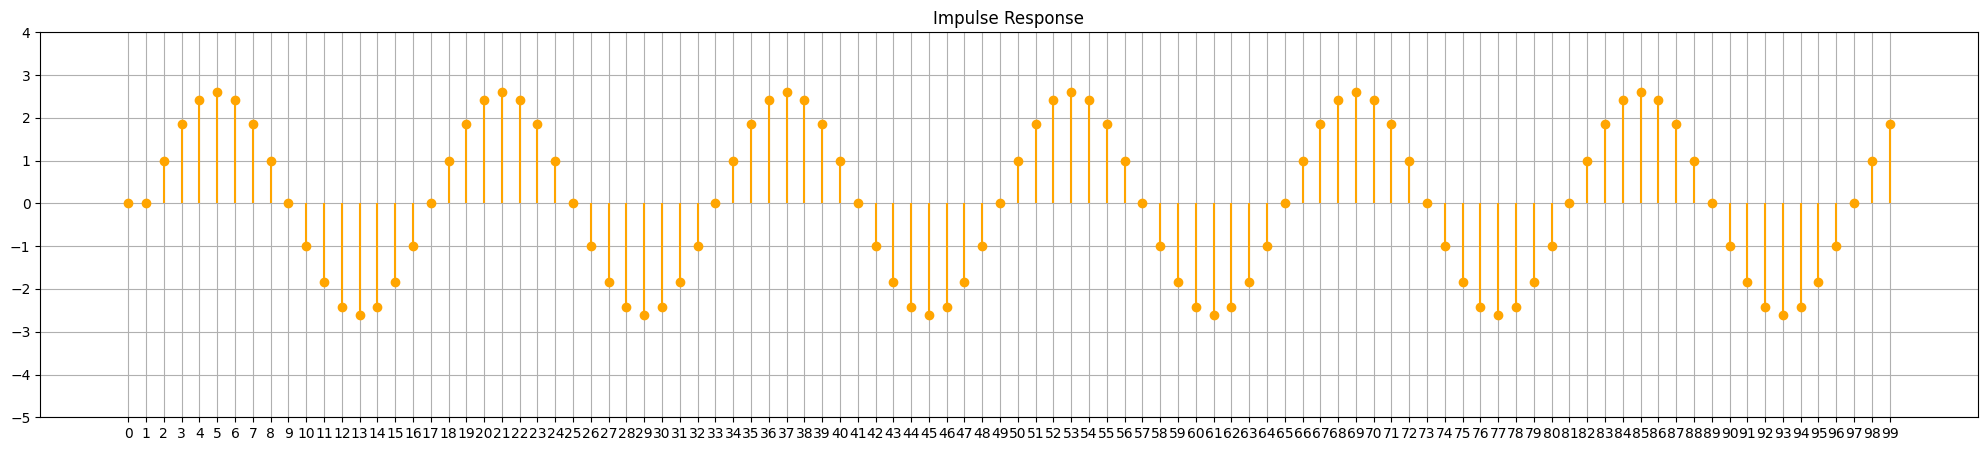

In [12]:
### Código da questão 3a
a_2 = 1
a_1 = -2 * np.cos(np.pi / 8)
a_0 = 1
b_2 = 1
b_1 = 0
b_0 = 0

RECURSIVE_OPTMIZATION_MATRIX = [["x" for i in range(101)] for j in range(101)]
h_3a = [impulse_response_analytical_solution(i) for i in range(100)]

plt.figure()
plt.stem(h_3a, linefmt="orange", markerfmt="o", basefmt=" ")
plt.xticks(np.arange(0, len(h_3a), step=1))
plt.yticks(np.arange(-5, 5, step=1))
plt.title("Impulse Response")
plt.grid()
plt.gcf().set_size_inches(25, 5)
plt.show()

## Questão 3b (1 ponto)
Escreva um programa para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida com a resposta analítica, plotando o gráfico das duas respostas para as primeiras 100 amostras. Calcule também o erro médio quadrático entre os dois sinais.

⚠️⚠️⚠️ Erro médio quadrático: 4.356977387148801e-30


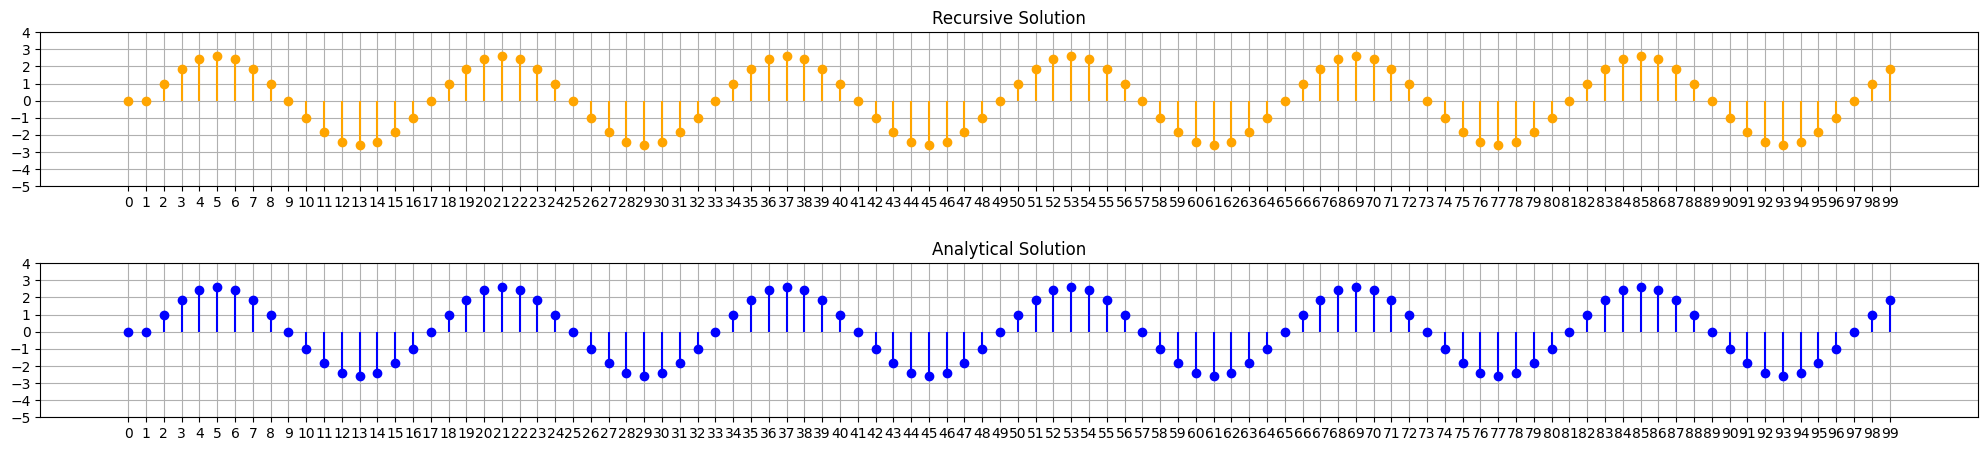

In [13]:
### Código da questão 3b
RECURSIVE_OPTMIZATION_MATRIX = [["x" for i in range(101)] for j in range(101)]
h_3b = [impulse_response_recursive_solution(i) for i in range(100)]

h_3_error = erro_medio_quadratico(impulse_response_recursive_solution, impulse_response_analytical_solution, 100)

print(f"⚠️⚠️⚠️ Erro médio quadrático: {np.abs(h_3_error)}")

plt.figure()
plt.subplot(2, 1, 1)
plt.stem(h_3b, linefmt="orange", markerfmt="o", basefmt=" ")
plt.xticks(np.arange(0, len(h_3b), step=1))
plt.yticks(np.arange(-5, 5, step=1))
plt.title("Recursive Solution")
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(h_3a, linefmt="blue", markerfmt="o", basefmt=" ")
plt.xticks(np.arange(0, len(h_3a), step=1))
plt.yticks(np.arange(-5, 5, step=1))
plt.title("Analytical Solution")
plt.grid()

plt.subplots_adjust(hspace=0.5)
plt.gcf().set_size_inches(25, 5)

plt.show()